In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
## create dtf

data = pd.read_csv("data.csv")

## dropping all columns except the following
data = data[['student_star','comments']]

# 5.0 to 4.0 - Good
# 3.5 to 2.5 - Average
# 2.0 to 1.0 - Bad

data['student_star'] = data['student_star'].replace([5.0],'Good')
data['student_star'] = data['student_star'].replace([4.5],'Good')
data['student_star'] = data['student_star'].replace([4.0],'Good')

data['student_star'] = data['student_star'].replace([3.5],'Average')
data['student_star'] = data['student_star'].replace([3.0],'Average')
data['student_star'] = data['student_star'].replace([2.5],'Average')

data['student_star'] = data['student_star'].replace([2.0],'Bad')
data['student_star'] = data['student_star'].replace([1.5],'Bad')
data['student_star'] = data['student_star'].replace([1.0],'Bad')

## rename columns
data = data.rename(columns={"student_star":"Labels", "comments":"Text"})

## dropping rows with na
data = data.dropna()

## print 5 random rows
data.sample(5)

## removing blank rows
data = data.dropna()

In [3]:
## Class distribution

data['Labels'].value_counts()

Good       11814
Bad         4764
Average     3415
Name: Labels, dtype: int64

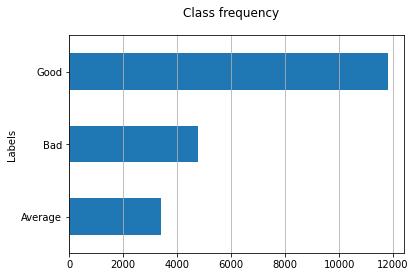

In [4]:
## Plotting class distribution

fig, ax = plt.subplots()
fig.suptitle("Class frequency", fontsize=12)
data["Labels"].reset_index().groupby("Labels").count().sort_values(by = "index").plot(kind = "barh", legend=False, ax=ax).grid(axis = 'x')
plt.show()

In [6]:
## Data snapshot

data.head()

,Labels,Text
0,Good,"This class is hard, but its a two-in-one gen-e..."
1,Good,Definitely going to choose Prof. Looney\'s cla...
2,Good,I overall enjoyed this class because the assig...
3,Good,"Yes, it\'s possible to get an A but you\'ll de..."
4,Good,Professor Looney has great knowledge in Astron...


In [7]:
## Split data into 70% training and 30% testing set

feature_cols = ['Text']
X = data[feature_cols]
y = data.Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
## Using Tf-Idf to get features from words

vect = TfidfVectorizer()
X_train_dtm = vect.fit_transform(X_train.Text)
X_test_dtm = vect.transform(X_test.Text)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(13995, 13805)
(5998, 13805)


In [11]:
## Preparing a dataframe to store the results
evaluation = pd.read_csv("results.csv")

##### Loading the different ML models.
##### Training and Testing

c:\users\teacher\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



Logistic Regression:
	Accuracy: 0.6973991330443481
	Precision: 0.5938186276320946
	Recall: 0.5829795136445383
	F1-Score: 0.5869224812376478
Detail:
              precision    recall  f1-score   support

     Average       0.33      0.27      0.29      1020
         Bad       0.66      0.63      0.65      1450
        Good       0.79      0.85      0.82      3528

    accuracy                           0.70      5998
   macro avg       0.59      0.58      0.59      5998
weighted avg       0.68      0.70      0.69      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

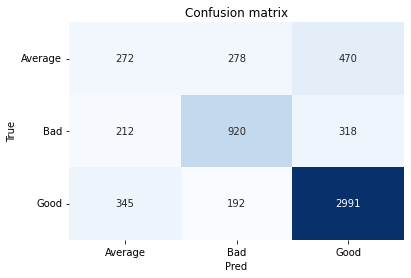

In [12]:
model = LogisticRegression(C=1e9)
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nLogistic Regression:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning and TfIdf Vectorizer', 
           'Algorithm':'Logistic Regression', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


SVM:
	Accuracy: 0.745248416138713
	Precision: 0.6501908885265714
	Recall: 0.5861578501132253
	F1-Score: 0.582596378524901
Detail:
              precision    recall  f1-score   support

     Average       0.45      0.12      0.19      1020
         Bad       0.74      0.69      0.71      1450
        Good       0.77      0.95      0.85      3528

    accuracy                           0.75      5998
   macro avg       0.65      0.59      0.58      5998
weighted avg       0.70      0.75      0.70      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

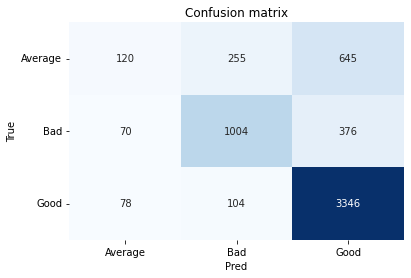

In [13]:
model = SVC()
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nSVM:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning and TfIdf Vectorizer', 
           'Algorithm':'SVM', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


Multinomial NB:
	Accuracy: 0.6315438479493164
	Precision: 0.6096462871866948
	Recall: 0.39397428703282084
	F1-Score: 0.3562261023330399
Detail:
              precision    recall  f1-score   support

     Average       0.33      0.00      0.00      1020
         Bad       0.88      0.18      0.30      1450
        Good       0.62      1.00      0.76      3528

    accuracy                           0.63      5998
   macro avg       0.61      0.39      0.36      5998
weighted avg       0.63      0.63      0.52      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

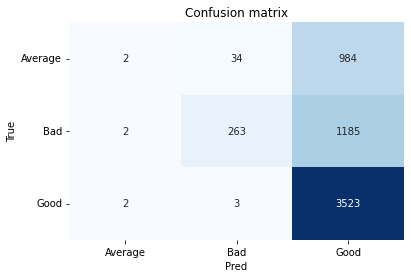

In [14]:
model = MultinomialNB()
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nMultinomial NB:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning and TfIdf Vectorizer', 
           'Algorithm':'Multinomial NB', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


Decision Tree:
	Accuracy: 0.6098699566522174
	Precision: 0.5027417349816118
	Recall: 0.4979881071202428
	F1-Score: 0.49981832819372346
Detail:
              precision    recall  f1-score   support

     Average       0.25      0.22      0.23      1020
         Bad       0.53      0.51      0.52      1450
        Good       0.73      0.76      0.74      3528

    accuracy                           0.61      5998
   macro avg       0.50      0.50      0.50      5998
weighted avg       0.60      0.61      0.60      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

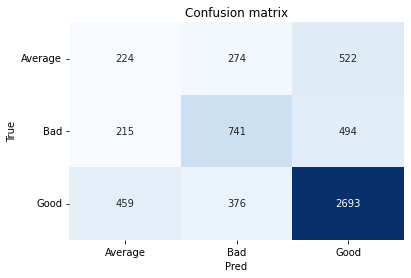

In [15]:
model = DecisionTreeClassifier()
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nDecision Tree:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning and TfIdf Vectorizer', 
           'Algorithm':'Decision Tree', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


KNN:
	Accuracy: 0.2750916972324108
	Precision: 0.44111771801780925
	Recall: 0.3499004199380902
	F1-Score: 0.20351628120662202
Detail:
              precision    recall  f1-score   support

     Average       0.17      0.06      0.08      1020
         Bad       0.25      0.92      0.39      1450
        Good       0.90      0.07      0.14      3528

    accuracy                           0.28      5998
   macro avg       0.44      0.35      0.20      5998
weighted avg       0.62      0.28      0.19      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

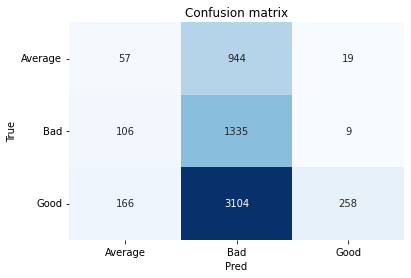

In [16]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nKNN:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning and TfIdf Vectorizer', 
           'Algorithm':'KNN', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


Random Forest:
	Accuracy: 0.693731243747916
	Precision: 0.6571955049652343
	Recall: 0.48724692175720863
	F1-Score: 0.4690798265059781
Detail:
              precision    recall  f1-score   support

     Average       0.50      0.01      0.01      1020
         Bad       0.79      0.47      0.59      1450
        Good       0.68      0.98      0.80      3528

    accuracy                           0.69      5998
   macro avg       0.66      0.49      0.47      5998
weighted avg       0.68      0.69      0.62      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

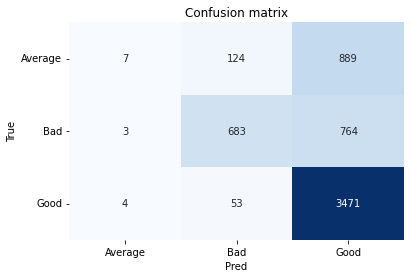

In [17]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nRandom Forest:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning and TfIdf Vectorizer', 
           'Algorithm':'Random Forest', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

In [18]:
evaluation.to_csv('results.csv')